In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    "가로": [10, 20, 30, 10, 30, 20, 11],
    "세로": [20, 23, 22, 33, 22, 12, 11],
    "높이": [50, 40, 20, 50, 20, 30, 40]
})
df

,가로,세로,높이
0,10,20,50
1,20,23,40
2,30,22,20
3,10,33,50
4,30,22,20
5,20,12,30
6,11,11,40


### sum

In [3]:
df.sum(axis=0)

가로    131
세로    143
높이    250
dtype: int64

In [4]:
df.sum(axis=1)

0    80
1    83
2    72
3    93
4    72
5    62
6    62
dtype: int64

### divide

In [7]:
# 비율
df.divide(df.sum(axis=1), axis=0)

,가로,세로,높이
0,0.125000,0.250000,0.625000
1,0.240964,0.277108,0.481928
2,0.416667,0.305556,0.277778
3,0.107527,0.354839,0.537634
4,0.416667,0.305556,0.277778
5,0.322581,0.193548,0.483871
6,0.177419,0.177419,0.645161


### 누적계산

In [10]:
df

,가로,세로,높이
0,10,20,50
1,20,23,40
2,30,22,20
3,10,33,50
4,30,22,20
5,20,12,30
6,11,11,40


In [12]:
# 누적곱
df.cumprod(axis=0)

,가로,세로,높이
0,10,20,50
1,200,460,2000
2,6000,10120,40000
3,60000,333960,2000000
4,1800000,7347120,40000000
5,36000000,88165440,1200000000
6,396000000,969819840,48000000000


In [14]:
df.cumprod(axis=1)

,가로,세로,높이
0,10,200,10000
1,20,460,18400
2,30,660,13200
3,10,330,16500
4,30,660,13200
5,20,240,7200
6,11,121,4840


### 누적 최대값

In [19]:
df.cummax(axis=0)

,가로,세로,높이
0,10,20,50
1,20,23,50
2,30,23,50
3,30,33,50
4,30,33,50
5,30,33,50
6,30,33,50


### apply함수

In [23]:
def getVolume(row):
    return row['가로'] * row['세로'] * row['높이']

df['부피'] = df.apply(getVolume, axis=1)
df

,가로,세로,높이,부피
0,10,20,50,10000
1,20,23,40,18400
2,30,22,20,13200
3,10,33,50,16500
4,30,22,20,13200
5,20,12,30,7200
6,11,11,40,4840


### concat함수

In [24]:
df

,가로,세로,높이,부피
0,10,20,50,10000
1,20,23,40,18400
2,30,22,20,13200
3,10,33,50,16500
4,30,22,20,13200
5,20,12,30,7200
6,11,11,40,4840


In [25]:
df2 = pd.DataFrame({
    "가로": [13, 12, 35, 12, 99, 12, 11],
    "세로": [20, 14, 22, 33, 22, 12, 11],
    "높이": [22, 8, 40, 37, 23, 34, 40]
})
df2

,가로,세로,높이
0,13,20,22
1,12,14,8
2,35,22,40
3,12,33,37
4,99,22,23
5,12,12,34
6,11,11,40


In [29]:
pd.concat([df, df2], axis=0)

,가로,세로,높이,부피
0,10,20,50,10000.0
1,20,23,40,18400.0
2,30,22,20,13200.0
3,10,33,50,16500.0
4,30,22,20,13200.0
5,20,12,30,7200.0
6,11,11,40,4840.0
0,13,20,22,NaN
1,12,14,8,NaN
2,35,22,40,NaN


### 중복데이터 처리

In [31]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5],
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [32]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

keep속성을 사용하여 어떤 중복값을 중복으로 인식할건지 결정(default=first)

In [33]:
df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

subset 속성을 사용하여 특정 컬럼에 대한 중복만 처리

In [34]:
df.duplicated(subset=['brand'])

0    False
1     True
2    False
3     True
4     True
dtype: bool

중복값 삭제

In [35]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [37]:
df.drop_duplicates(subset=['brand'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
4,Indomie,pack,5.0


### 결측 데이터 처리

In [38]:
import numpy as np

In [40]:
df = pd.DataFrame([
    [1, 5, 2],
    [np.nan, 1, 3],
    [6, np.nan, 20],
    [2, 5, np.nan],
    [2, 5, 2],
])

df

,0,1,2
0,1.0,5.0,2.0
1,NaN,1.0,3.0
2,6.0,NaN,20.0
3,2.0,5.0,NaN
4,2.0,5.0,2.0


In [41]:
df.isnull()

,0,1,2
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


각 컬럼별로 몇개의 결측지가 있나?

In [42]:
df.isnull().sum()

0    1
1    1
2    1
dtype: int64

### fillna 결측지 채우기

In [43]:
df.fillna(999)

,0,1,2
0,1.0,5.0,2.0
1,999.0,1.0,3.0
2,6.0,999.0,20.0
3,2.0,5.0,999.0
4,2.0,5.0,2.0


forward fill -> 앞의 값으로 대체 <br>
back fill -> 뒷값으로 대체

In [44]:
df.fillna(method='ffill')

/var/folders/m9/7h9w_zgx3hz54zgk768k9vt00000gn/T/ipykernel_26801/1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,1.0,5.0,2.0
1,1.0,1.0,3.0
2,6.0,1.0,20.0
3,2.0,5.0,20.0
4,2.0,5.0,2.0


In [51]:
df.bfill(axis=1)

,0,1,2
0,1.0,5.0,2.0
1,1.0,1.0,3.0
2,6.0,20.0,20.0
3,2.0,5.0,NaN
4,2.0,5.0,2.0


결측지 삭제

In [52]:
df.dropna()

,0,1,2
0,1.0,5.0,2.0
4,2.0,5.0,2.0


### 시각화 matplotlib

In [53]:
import matplotlib.pyplot as plt

In [55]:
sample = pd.read_csv('./내국인 생활인구.csv', encoding='cp949')
sample.head(2)

,일자(stdr_de_id),시간(tmzon_pd_se),행정동코드(adstrd_code_se),집계구코드(oa_cd),생활인구합계(tot_lvpop_co),남자0~9세(male_f0t9_lvpop_co),남자10~14세(male_f10t14_lvpop_co),남자15~19세(male_f15t19_lvpop_co),남자20~24세(male_f20t24_lvpop_co),남자25~29세(male_f25t29_lvpop_co),...,여자40~44세(female_f40t44_lvpop_co),여자45~49세(female_f45t49_lvpop_co),여자50~54세(female_f50t54_lvpop_co),여자55~59세(female_f55t59_lvpop_co),여자60~64세(female_f60t64_lvpop_co),여자65~69세(female_f65t69_lvpop_co),여자70~74세(female_f70t74_lvpop_co),여자75~79세(female_f75t79_lvpop_co),여자80세이상(female_above_80_lvpop_co),등록일자(ldadng_dt)
0,20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
1,20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44


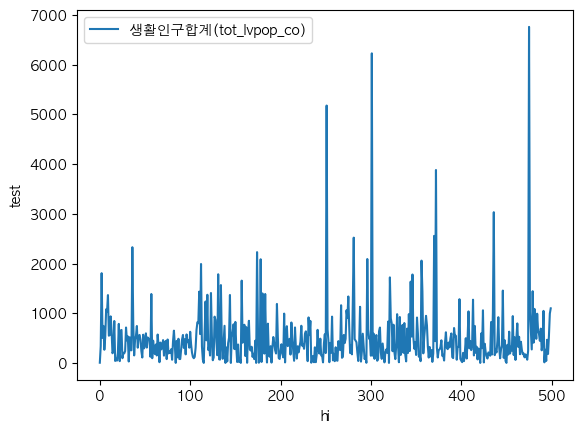

In [58]:
# 글꼴설정
# plt.rc('font', family='AppleGothic')

sample['생활인구합계(tot_lvpop_co)'].plot(xlabel='hi', ylabel='test')
plt.legend()

### 그래프 사이즈 조절

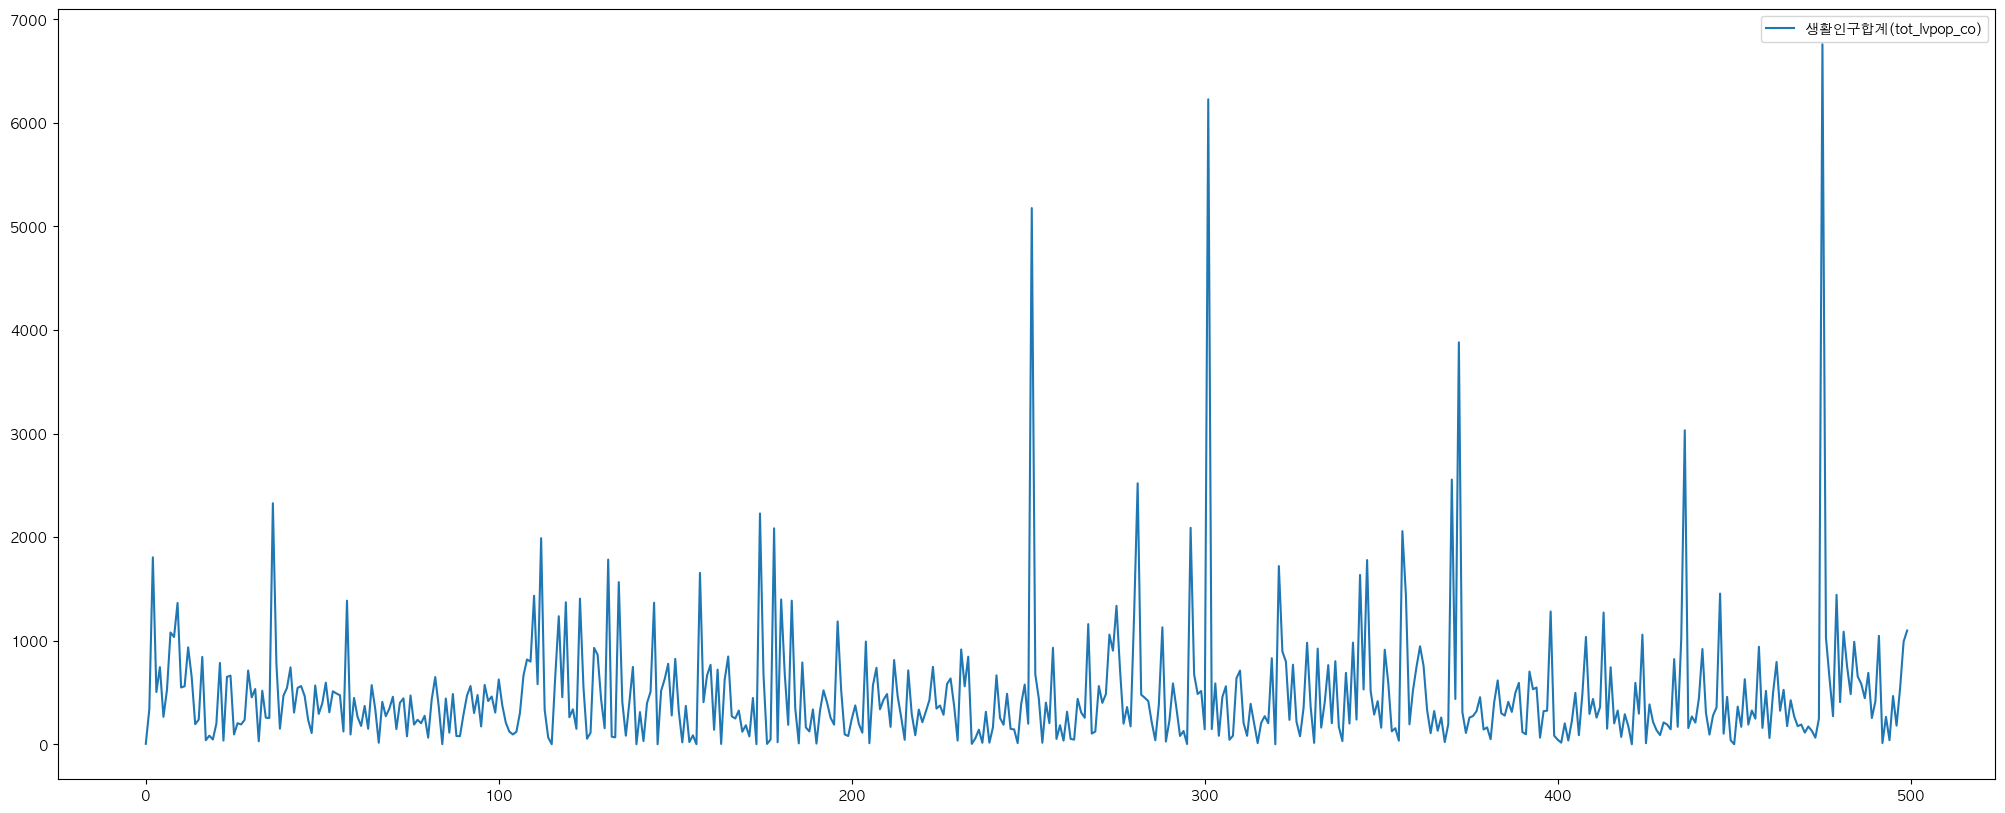

In [61]:
plt.figure(figsize=(25, 10))
sample["생활인구합계(tot_lvpop_co)"].plot()
plt.legend()

여러그래프를 한번에